# Matteo colourmaps

Matteo Niccoli has made some awesome colourmaps, and has published a routine to convert them to Matplotlib colourmaps. This is very cool! 

He explains all in his 25 April 2014 blog post [Convert colour palettes to Python Matplotlib colour palettes](http://mycarta.wordpress.com/2014/04/25/convert-color-palettes-to-python-matplotlib-colormaps/).

## Load the data

There's a bit at the start where you are downloading data, unzipping, reformatting, etc. I thought I'd try doing all that in Python too...

In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


We can read the data straight from the web. We'll need some of the standard libraries. 

In [2]:
import urllib2, zipfile, StringIO

Now we can read the zip file and examine its contents. We'll keep it in memory using a <code>StringIO</code> object.

In [3]:
remote_file = 'http://mycarta.files.wordpress.com/2013/03/0-1.odt'

# Read the data from the web, as normal.
web_data = urllib2.urlopen(remote_file)
 
# Convert the bytes into a file-like object in memory
zip_in_memory = StringIO.StringIO(web_data.read())
 
# Instantiate a ZipFile object from the file-like in memory.
z = zipfile.ZipFile(zip_in_memory)
 
z.namelist()

['cube1_0-1.csv',
 '__MACOSX/',
 '__MACOSX/._cube1_0-1.csv',
 'cubeYF_0-1.csv',
 '__MACOSX/._cubeYF_0-1.csv',
 'Linear_L_0-1.csv',
 '__MACOSX/._Linear_L_0-1.csv']

We need file number 5.

In [4]:
f = z.open(z.namelist()[5])
raw_data = f.read()

Let's look at the first 100 characters:

In [5]:
raw_data[:100]

'0.0143,0.0143,0.0143\r0.0404,0.0125,0.0325\r0.0516,0.0154,0.0443\r0.0616,0.0184,0.0530\r0.0699,0.0215,0.'

We just need to split this to get a list of strings:

In [6]:
list_o_strings = raw_data.split()
list_o_strings[:10]

['0.0143,0.0143,0.0143',
 '0.0404,0.0125,0.0325',
 '0.0516,0.0154,0.0443',
 '0.0616,0.0184,0.0530',
 '0.0699,0.0215,0.0615',
 '0.0814,0.0229,0.0687',
 '0.0857,0.0273,0.0763',
 '0.0928,0.0305,0.0805',
 '0.1008,0.0330,0.0846',
 '0.1064,0.0356,0.0939']

Now we can use a nested list comprehension to step over the list of strings, splitting each string on its commas, and converting each element (which will still be a string) to a floating point number...

In [7]:
list_o_lists = [[float(num) for num in string.split(',')] for string in list_o_strings]
list_o_lists[:10]

[[0.0143, 0.0143, 0.0143],
 [0.0404, 0.0125, 0.0325],
 [0.0516, 0.0154, 0.0443],
 [0.0616, 0.0184, 0.053],
 [0.0699, 0.0215, 0.0615],
 [0.0814, 0.0229, 0.0687],
 [0.0857, 0.0273, 0.0763],
 [0.0928, 0.0305, 0.0805],
 [0.1008, 0.033, 0.0846],
 [0.1064, 0.0356, 0.0939]]

In [8]:
LinL = np.array(list_o_lists)
LinL[:3]

array([[ 0.0143,  0.0143,  0.0143],
       [ 0.0404,  0.0125,  0.0325],
       [ 0.0516,  0.0154,  0.0443]])

Win!

## Continue with Matteo's workflow

We'll just run Matteo's code...

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
b3 = LinL[:,2] # value of blue at sample n
b2 = LinL[:,2] # value of blue at sample n
b1 = linspace(0, 1, len(b2)) # position of sample n - ranges from 0 to 1

# Setting up columns for tuples
g3 = LinL[:,1]
g2 = LinL[:,1]
g1 = linspace(0,1,len(g2))

r3 = LinL[:,0]
r2 = LinL[:,0]
r1 = linspace(0,1,len(r2))

# Creating tuples
R = zip(r1,r2,r3)
G = zip(g1,g2,g3)
B = zip(b1,b2,b3)

# Transposing
RGB = zip(R,G,B)
rgb = zip(*RGB)

# Creating dictionary
k = ['red', 'green', 'blue']
LinearL = dict(zip(k,rgb))

And test it with a plot.

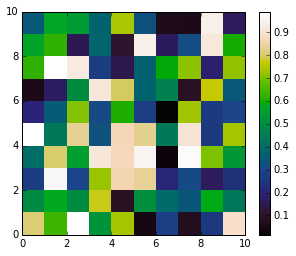

In [11]:
my_cmap = matplotlib.colors.LinearSegmentedColormap('matteo', LinearL)

plt.figure(figsize=(5,4))
plt.pcolor(rand(10,10),cmap=my_cmap)
plt.colorbar()
plt.show()

## Reverse it

To make a reversed version, I think we have to reverse <code>rgb</code> and repeat the process. It's a three-element list, where each element is a tuple of tuples.

In [12]:
def reverse_colourmap(cmap):
    reverse = []
    for channel in cmap:
        data = []
        for t in channel:
            data.append((1 - t[0], t[1], t[2]))
        reverse.append(sorted(data))
        
    return reverse

In [13]:
rgb_r = reverse_colourmap(rgb)

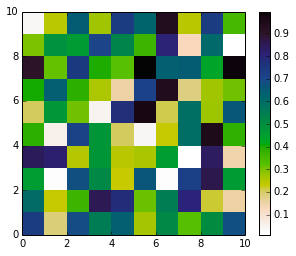

In [14]:
LinearL_r = dict(zip(k,rgb_r))
my_cmap_r = matplotlib.colors.LinearSegmentedColormap('matteo_r', LinearL_r)

plt.figure(figsize=(5,4))
plt.pcolor(rand(10,10),cmap=my_cmap_r)
plt.colorbar()
plt.show()

The <code>sorted()</code> is important. As well as having the right <code>x</code> values, the coloumap channels must be in order.

Instead of reversing the finished colourmap, let's do it from the start, with the original code...

In [15]:
def gen_cmap(name, array, start, end):
    b3 = array[:,2] # value of blue at sample n
    b2 = array[:,2] # value of blue at sample n
    b1 = linspace(start, end, len(b2)) # position of sample n - ranges from 0 to 1
    
    # Setting up columns for tuples
    g3 = array[:,1]
    g2 = array[:,1]
    g1 = linspace(start, end, len(g2))
    
    r3 = array[:,0]
    r2 = array[:,0]
    r1 = linspace(start, end, len(r2))
    
    # Creating tuples
    R = sorted(zip(r1,r2,r3))
    G = sorted(zip(g1,g2,g3))
    B = sorted(zip(b1,b2,b3))
    
    # Transposing
    RGB = zip(R,G,B)
    rgb = zip(*RGB)
    
    # Creating dictionary
    k = ['red', 'green', 'blue']
    LinearL = dict(zip(k,rgb))
    
    return matplotlib.colors.LinearSegmentedColormap(name, LinearL)

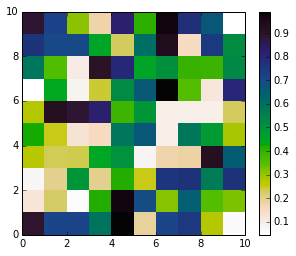

In [16]:
my_cmap_r = gen_cmap('matteo_r', LinL, 1, 0)

plt.figure(figsize=(5,4))
plt.pcolor(rand(10,10),cmap=my_cmap_r)
plt.colorbar()
plt.show()

And just check this works with the original...

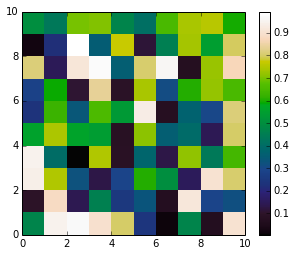

In [17]:
my_cmap = gen_cmap('matteo', LinL, 0, 1)

plt.figure(figsize=(5,4))
plt.pcolor(rand(10,10),cmap=my_cmap)
plt.colorbar()
plt.show()

Ha, I just read about <code>numpy.flipud(a)</code> and realized you could just flip the array we started with:

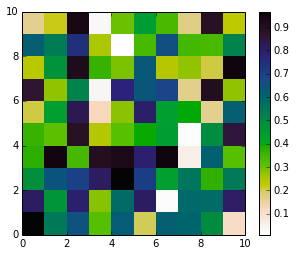

In [18]:
my_cmap_r = gen_cmap('matteo_r', np.flipud(LinL), 0, 1)

plt.figure(figsize=(5,4))
plt.pcolor(rand(10,10),cmap=my_cmap_r)
plt.colorbar()
plt.show()

NumPy is awesome.

## For the impatient

You can also use the built-in cubehelix from matplotlib to produce a similar colourmap:

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


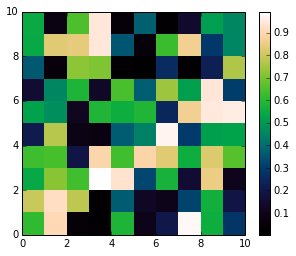

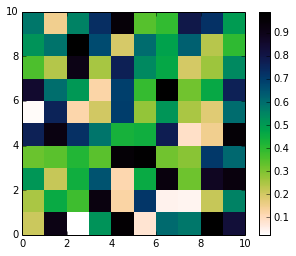

In [19]:
%matplotlib inline
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib._cm, matplotlib.cm
name    = "matteohelix"
specs   = matplotlib._cm.cubehelix(gamma=1.4,s=0.4,r=-0.8,h=2.0)
specs_r = matplotlib.cm._reverse_cmap_spec(specs)
matplotlib.cm.register_cmap(name=name     , data=specs)
matplotlib.cm.register_cmap(name=name+"_r", data=specs_r)

plt.figure(figsize=(5,4))
plt.pcolor(rand(10,10),cmap=matplotlib.cm.get_cmap(name))
plt.colorbar()
plt.show()

plt.figure(figsize=(5,4))
plt.pcolor(rand(10,10),cmap=matplotlib.cm.get_cmap(name+'_r'))
plt.colorbar()
plt.show()